In [1]:
include("../EuclidElements.jl");

# Book 1

## Proposition 3 

Given 2 unequal straight lines, to cut off from the greater a straight line equal to the less...

### Base case

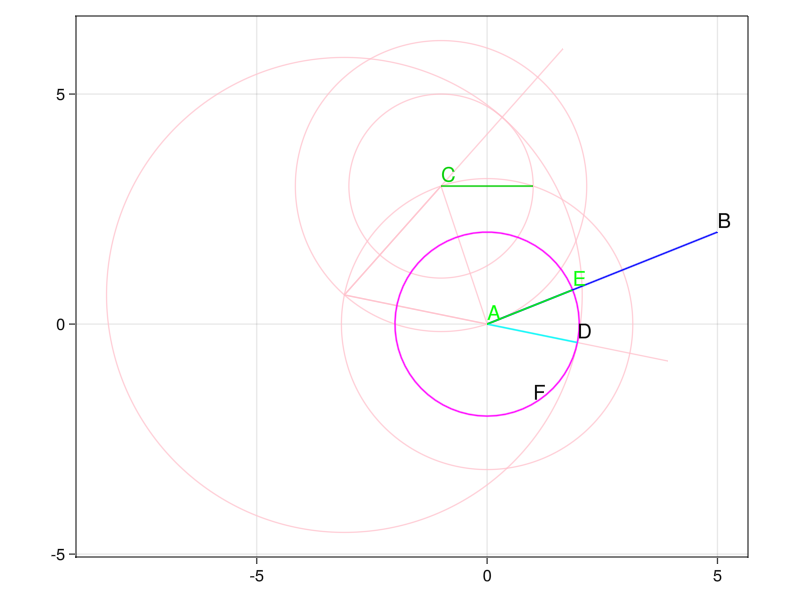

In [2]:
A = Point2f(0, 0)
B = Point2f(5, 2)
C = [Point2f(-1, 3), Point2f(1, 3)]

#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect())

D_lines = equivalent_line(A, C[1], C[2], color=:pink)
fill_equivalent(D_lines)

D = Point(D_lines)

r_DEF = norm(A-D)
F = Point2f(r_DEF/2, -r_DEF*(√3)/2)
v = B - A
u = v / norm(v)
E = A + r_DEF*u

DEF = lines!(Circle(A, r_DEF),color=:magenta)

AB = lines!([A,B], color=:blue)
Cline = lines!(C, color=:green3)
AD = lines!([A,D], color=:cyan)
AE = lines!([A,E], color=:green1)

#Now draw the point labels
Apoint = text!(A, text="A", color=:green1)
Bpoint = text!(B, text="B")
C1point = text!(C[1], text="C", color=:green3)
Dpoint = text!(D, text="D", color=:black)
Epoint = text!(E, text="E", color=:green1)
Fpoint = text!(F, text="F", color=:black)

#Draw and show the chart :)
current_figure()

### ANIMATION

In [3]:
A = Point2f(0, 0)
B = Point2f(5, 2)
C = [Point2f(-1, 3), Point2f(1, 3)]

#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 3")
xlims!(ax, -9,7)
ylims!(ax, -7,7)

E_lines = draw_cut_line(A, B, C[1], C[2], color=:pink, linewidth=5f0)
E = Point(E_lines)

AB = straight_line(A, B, color=:blue, linewidth=2f0)
fill_line(AB)
Cline = straight_line(C[1], C[2], color=RGB(0.0, 0.8, 0.0), linewidth=2f0)
fill_line(Cline)

AE = straight_line(A, E, color=RGB(0.0, 0.8, 0.0), linewidth=2f0)

#Now draw the point labels, highlighting A and L!
LAlpha = Observable(0f0)
Apoint = text!(A, text="A", color=RGB(0.0, 0.8, 0.0))
Bpoint = text!(B, text="B")
C1point = text!(C[1], text="C", color=RGB(0.0, 0.8, 0.0))
Epoint = text!(E, text="E", color=@lift(RGBA(0.0, 0.8, 0.0, $LAlpha)))

# Draw the animation!
framerate = 24
d_s = 24
timestamps = range(0,5π, step=5π/(d_s*framerate))

record(f, "Euclid-I-3.gif", timestamps; framerate=framerate) do t
    animate_cut_line(E_lines, 0.5π, 2.5π, t, fade_start=3π, fade_end=4π)
    animate_line(AE, 2.5π, 3π, t)

    # Animate the filled equilateral triangle appearing
    if t > 2.5π && t <= 3.5π
        showL = t - 2.5π
        LAlpha[] = showL
    end
end;

![animation](Euclid-I-3.gif)